In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.model_selection import StratifiedKFold
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [15]:
df = pd.read_csv("AI_Human.csv")

In [16]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [17]:
for text in range (1):
    print(text,df['text'][text])

0 Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article,

In [18]:
df['len']=df['text'].apply(len)

In [19]:
df

,text,generated,len
0,Cars. Cars have been around since they became ...,0.0,3289
1,Transportation is a large necessity in most co...,0.0,2738
2,"""America's love affair with it's vehicles seem...",0.0,4428
3,How often do you ride in a car? Do you drive a...,0.0,4013
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698
...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968
487231,The whole purpose of democracy is to create a ...,0.0,2319
487232,I firmly believe that governments worldwide sh...,1.0,2392
487233,I DFN't agree with this decision because a LFT...,0.0,1668


In [20]:
human=df[df['generated']==1]
ai=df[df['generated']==0]

In [21]:
total_reviews = len(human) + len(ai)
percentage_negative = (len(human) / total_reviews) * 100

print(f"The dataset contains {len(human)} texts written by humans.")
print(f"The dataset contains {len(ai)} texts generated by AI.")
print(f"We have a well-balanced database.")

The dataset contains 181438 texts written by humans.
The dataset contains 305797 texts generated by AI.
We have a well-balanced database.


In [22]:
df['generated_cor'] = df['generated'].replace({
    1: 'Human',
    0: 'AI'
})

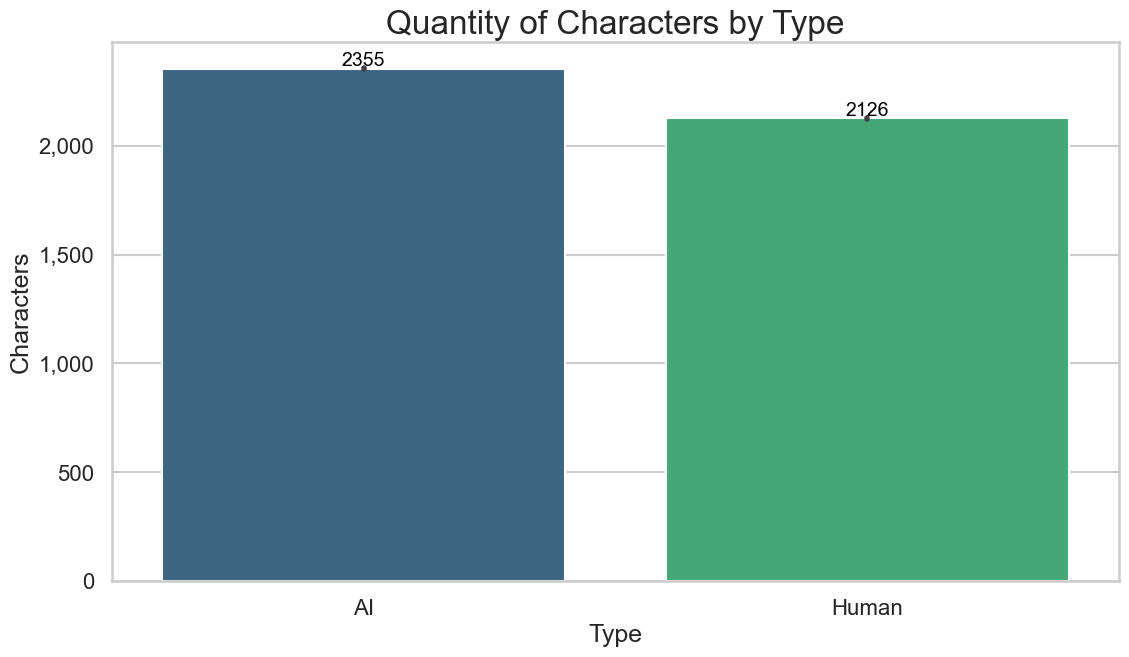

In [23]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(13, 7))
ax = sns.barplot(y='len', x='generated_cor', data=df, palette='viridis')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:0.0f}'.format(height), (p.get_x() + p.get_width() / 2., height + 5), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Quantity of Characters by Type', fontsize=24)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Characters', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

In [25]:
pipeMNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',MultinomialNB())])
pipeCNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',ComplementNB())])
pipeSVC = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',LinearSVC())])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['generated_cor'],test_size=0.2)

In [27]:
pipeMNB.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

In [28]:
pipeCNB.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', ComplementNB())])

In [37]:
pipeSVC.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [38]:
predictMNB = pipeMNB.predict(x_test)
predictCNB = pipeCNB.predict(x_test)
predictCSV = pipeSVC.predict(x_test)

In [39]:
mnb = accuracy_score(y_test,predictMNB)
cnb = accuracy_score(y_test,predictCNB)
svc = accuracy_score(y_test,predictCSV)

In [40]:
print(f"MNB: {mnb*100:.2f}%")
print(f"CNB: {cnb*100:.2f}%")
print(f"SVC: {svc*100:.2f}%")

MNB: 95.52%
CNB: 95.96%
SVC: 99.82%


In [41]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, predictMNB))
print("\nClassification Report for Complement Naive Bayes:")
print(classification_report(y_test, predictCNB))
print("\nClassification Report for Support Vector Classifier:")
print(classification_report(y_test, predictCSV))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

          AI       0.95      0.99      0.97     61275
       Human       0.97      0.90      0.94     36172

    accuracy                           0.96     97447
   macro avg       0.96      0.94      0.95     97447
weighted avg       0.96      0.96      0.95     97447


Classification Report for Complement Naive Bayes:
              precision    recall  f1-score   support

          AI       0.96      0.98      0.97     61275
       Human       0.96      0.93      0.94     36172

    accuracy                           0.96     97447
   macro avg       0.96      0.95      0.96     97447
weighted avg       0.96      0.96      0.96     97447


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

          AI       1.00      1.00      1.00     61275
       Human       1.00      1.00      1.00     36172

    accuracy              

In [42]:
human_sentence = ["Jenna Branson is a college student suffering from mental illness. Unhappy at home, she decides to run away after becoming noncompliant with her medication."]

transformed_frase_mnb = pipeMNB.named_steps['tfidf'].transform(human_sentence)
predicted_class_mnb = pipeMNB.named_steps['clf'].predict(transformed_frase_mnb)
print(f"Predict MNB: {predicted_class_mnb}")

transformed_frase_cnb = pipeCNB.named_steps['tfidf'].transform(human_sentence)
predicted_class_cnb = pipeCNB.named_steps['clf'].predict(transformed_frase_cnb)
print(f"Predict CNB: {predicted_class_cnb}")

transformed_frase_svc = pipeSVC.named_steps['tfidf'].transform(human_sentence)
predicted_class_svc = pipeSVC.named_steps['clf'].predict(transformed_frase_svc)
print(f"Predict SVC: {predicted_class_svc}")

Predict MNB: ['Human']
Predict CNB: ['Human']
Predict SVC: ['Human']


In [43]:
AI_generated_sentence = ["Every morning, the sun's golden rays bring a promise of new adventures and endless possibilities."]

transformed_frase_mnb = pipeMNB.named_steps['tfidf'].transform(AI_generated_sentence)
predicted_class_mnb = pipeMNB.named_steps['clf'].predict(transformed_frase_mnb)
print(f"Predict MNB: {predicted_class_mnb}")

transformed_frase_cnb = pipeCNB.named_steps['tfidf'].transform(AI_generated_sentence)
predicted_class_cnb = pipeCNB.named_steps['clf'].predict(transformed_frase_cnb)
print(f"Predict CNB: {predicted_class_cnb}")

transformed_frase_svc = pipeSVC.named_steps['tfidf'].transform(AI_generated_sentence)
predicted_class_svc = pipeSVC.named_steps['clf'].predict(transformed_frase_svc)
print(f"Predict SVC: {predicted_class_svc}")

Predict MNB: ['AI']
Predict CNB: ['AI']
Predict SVC: ['Human']
